In [1]:
%load_ext autoreload
%autoreload 2
%load_ext jupyter_black
%matplotlib inline

In [2]:
import datetime
import sevir.mrms as mrms
import sevir.mrms.constants as const

# download a zip file from the IAState archive based on the provided date.
# the zip files are index by the [year, month, day, hour] of the data contained
f = mrms.download("/mnt/data/mrms", date=datetime.datetime(2022, 6, 2, 1, 1))

INFO:root:🌩️ /mnt/data/mrms/2022060201.zip already exists 🌩️


In [3]:
assert f is not None

# extract a subset of the data in the archive
with mrms.IAStateZipFile(f) as z:
    files = z.extract_probsevere("/mnt/data/mrms")
    print(files)

['/mnt/data/mrms/2022060201/ProbSevere/MRMS_PROBSEVERE_20220602_012800.json', '/mnt/data/mrms/2022060201/ProbSevere/MRMS_PROBSEVERE_20220602_012000.json', '/mnt/data/mrms/2022060201/ProbSevere/MRMS_PROBSEVERE_20220602_013000.json', '/mnt/data/mrms/2022060201/ProbSevere/MRMS_PROBSEVERE_20220602_012400.json', '/mnt/data/mrms/2022060201/ProbSevere/MRMS_PROBSEVERE_20220602_014800.json', '/mnt/data/mrms/2022060201/ProbSevere/MRMS_PROBSEVERE_20220602_015800.json', '/mnt/data/mrms/2022060201/ProbSevere/MRMS_PROBSEVERE_20220602_010200.json', '/mnt/data/mrms/2022060201/ProbSevere/MRMS_PROBSEVERE_20220602_015600.json', '/mnt/data/mrms/2022060201/ProbSevere/MRMS_PROBSEVERE_20220602_011800.json', '/mnt/data/mrms/2022060201/ProbSevere/MRMS_PROBSEVERE_20220602_011200.json', '/mnt/data/mrms/2022060201/ProbSevere/MRMS_PROBSEVERE_20220602_014200.json', '/mnt/data/mrms/2022060201/ProbSevere/MRMS_PROBSEVERE_20220602_013400.json', '/mnt/data/mrms/2022060201/ProbSevere/MRMS_PROBSEVERE_20220602_012200.json'

In [4]:
df = mrms.read_many_probsevere(files)
df.head()

ID,validTime,PS,MUCAPE,MLCAPE,MLCIN,EBSHEAR,SRH01KM,MEANWIND_1-3kmAGL,MESH,VIL_DENSITY,FLASH_RATE,FLASH_DENSITY,MAXLLAZ,P98LLAZ,P98MLAZ,MAXRC_EMISS,MAXRC_ICECF,WETBULB_0C_HGT,PWAT,CAPE_M10M30,LJA,SIZE,AVG_BEAM_HGT,MOTION_EAST,MOTION_SOUTH,coordinates
i32,datetime[μs],i32,i32,i32,i32,f32,i32,f32,f32,f32,i32,f32,f32,f32,f32,str,str,f32,f32,i32,f32,i32,str,f32,f32,list[list[list[f64]]]
174541,2022-06-02 01:00:41,3,1194,70,-126,39.700001,60,15.5,0.0,0.76,1,0.07,0.002,0.002,0.001,null,null,11.9,1.7,192,0.0,227,"""5.15 kft / 1.5…",15.932,1.437,"[[[-74.66, 41.74], [-74.61, 41.74], … [-74.66, 41.74]]]"
174541,2022-06-02 01:02:40,4,1190,65,-126,39.5,60,15.5,0.04,0.85,2,0.07,0.002,0.002,0.002,null,null,11.9,1.7,190,0.0,229,"""5.13 kft / 1.5…",14.69,1.384,"[[[-74.64, 41.74], [-74.58, 41.73], … [-74.64, 41.74]]]"
174541,2022-06-02 01:04:39,4,1190,53,-124,38.799999,62,15.3,0.04,0.85,2,0.07,0.002,0.002,0.002,null,null,12.0,1.7,185,0.0,263,"""5.12 kft / 1.5…",11.396,2.175,"[[[-74.61, 41.72], [-74.55, 41.72], … [-74.61, 41.72]]]"
174541,2022-06-02 01:06:41,4,1167,47,-124,38.599998,62,15.3,0.04,0.85,2,0.07,0.002,0.002,0.002,null,null,12.0,1.7,178,0.0,226,"""5.07 kft / 1.5…",12.387,8.837,"[[[-74.58, 41.72], [-74.52, 41.71], … [-74.58, 41.72]]]"
174541,2022-06-02 01:08:39,3,1131,41,-119,38.299999,62,15.1,0.04,0.82,2,0.07,0.002,0.002,0.002,null,null,12.1,1.7,169,0.0,217,"""5.03 kft / 1.5…",13.878,2.103,"[[[-74.54, 41.71], [-74.5, 41.71], … [-74.54, 41.71]]]"


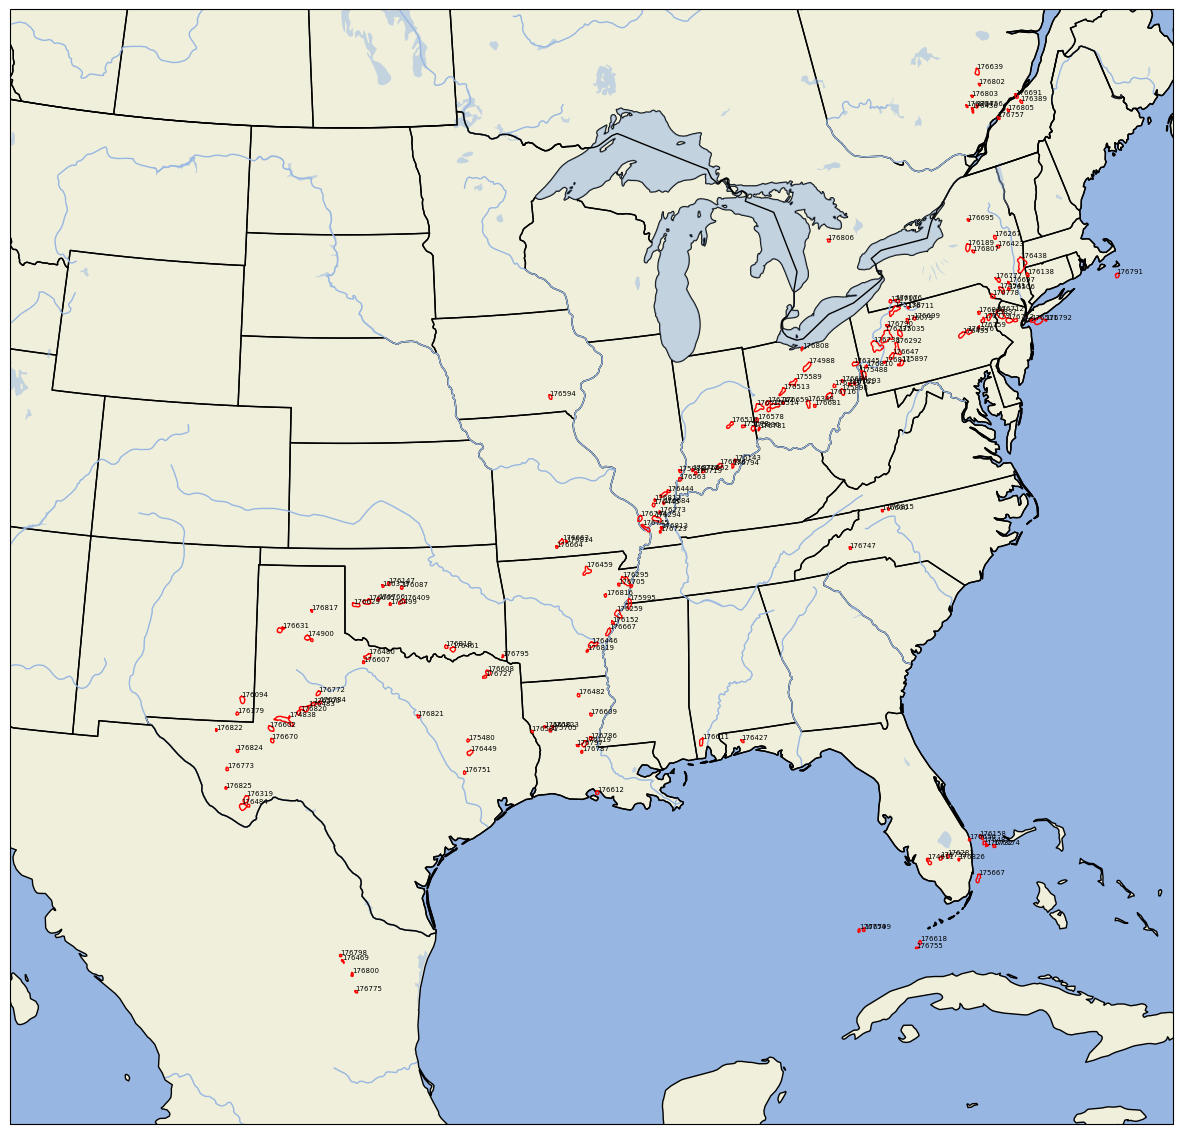

In [5]:
import numpy as np

import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.geoaxes import GeoAxes

ts = df.filter(df[const.VALID_TIME] == df[const.VALID_TIME].unique().sort()[0])
ts.with_columns(**{const.COORDINATES: ts[const.COORDINATES].to_list()})
fig = plt.figure(figsize=(15, 15))

proj = ccrs.LambertAzimuthalEqualArea(central_longitude=-100, central_latitude=40)
ax: GeoAxes = fig.add_subplot(1, 1, 1, projection=proj)  # type: ignore
ax.set_extent([-110, -75, 20, 50], ccrs.Geodetic())

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)


for i, row in enumerate(ts[const.COORDINATES].to_list()):
    x, y = np.array(row[0]).T
    ax.plot(x, y, transform=ccrs.PlateCarree(), color="red", linewidth=1)
    ax.text(x[0], y[0], ts[i, const.ID], transform=ccrs.PlateCarree(), color="black", fontsize=5)

In [6]:
import random

import polars as pl


event_id: int = random.choice(df.filter(df[const.PS] == 100).sort(pl.col(const.VALID_TIME))[const.ID].unique())
df = df.filter(df[const.ID] == event_id).sort(pl.col(const.VALID_TIME))
df.head()

ID,validTime,PS,MUCAPE,MLCAPE,MLCIN,EBSHEAR,SRH01KM,MEANWIND_1-3kmAGL,MESH,VIL_DENSITY,FLASH_RATE,FLASH_DENSITY,MAXLLAZ,P98LLAZ,P98MLAZ,MAXRC_EMISS,MAXRC_ICECF,WETBULB_0C_HGT,PWAT,CAPE_M10M30,LJA,SIZE,AVG_BEAM_HGT,MOTION_EAST,MOTION_SOUTH,coordinates
i32,datetime[μs],i32,i32,i32,i32,f32,i32,f32,f32,f32,i32,f32,f32,f32,f32,str,str,f32,f32,i32,f32,i32,str,f32,f32,list[list[list[f64]]]
176480,2022-06-02 01:00:41,90,2829,2114,-17,51.099998,22,11.1,0.86,2.28,22,0.59,0.006,0.005,0.007,"""0006Z 3.7%/min…","""0006Z 0.0/min …",12.5,1.9,695,0.6,278,"""1.83 kft / 0.5…",3.577,2.343,"[[[-99.19, 34.0], [-99.15, 34.0], … [-99.19, 34.0]]]"
176480,2022-06-02 01:02:40,95,2834,2118,-17,51.200001,22,11.1,0.9,2.28,39,1.14,0.006,0.005,0.007,"""0006Z 3.7%/min…","""0006Z 0.0/min …",12.5,1.9,698,4.5,243,"""1.87 kft / 0.5…",3.432,2.405,"[[[-99.18, 33.99], [-99.16, 33.97], … [-99.18, 33.99]]]"
176480,2022-06-02 01:04:39,96,2833,2118,-17,51.0,22,11.0,0.95,2.28,39,1.14,0.006,0.005,0.008,"""0006Z 3.7%/min…","""0006Z 0.0/min …",12.4,1.9,706,0.0,278,"""1.80 kft / 0.5…",4.082,2.962,"[[[-99.2, 33.99], [-99.14, 33.99], … [-99.2, 33.99]]]"
176480,2022-06-02 01:06:41,96,2838,2118,-17,50.900002,25,10.9,0.95,2.27,39,1.14,0.006,0.005,0.008,"""0006Z 3.7%/min…","""0006Z 0.0/min …",12.3,1.9,716,0.0,174,"""1.74 kft / 0.5…",5.866,3.136,"[[[-99.19, 33.99], [-99.15, 33.98], … [-99.19, 33.99]]]"
176480,2022-06-02 01:08:39,96,2838,2118,-17,50.900002,25,10.9,0.95,2.27,39,1.14,0.006,0.005,0.008,"""0006Z 3.7%/min…","""0006Z 0.0/min …",12.3,1.9,716,0.6,174,"""1.74 kft / 0.5…",6.757,0.885,"[[[-99.19, 33.99], [-99.15, 33.98], … [-99.19, 33.99]]]"


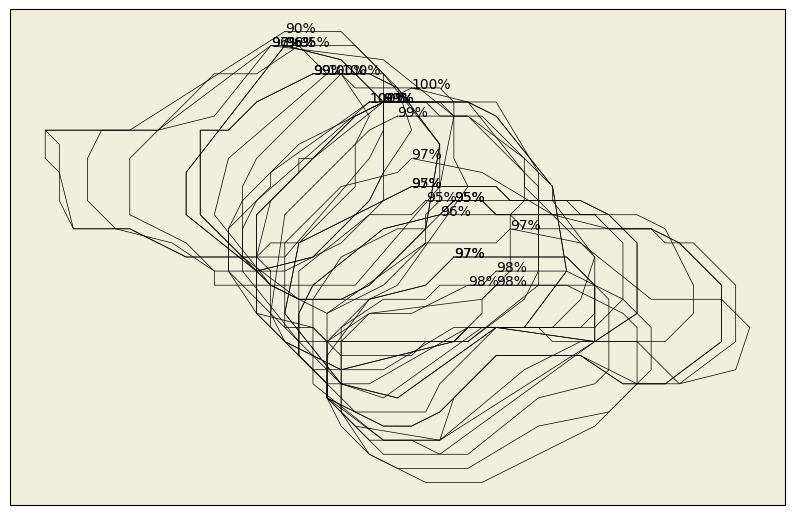

In [7]:
fig = plt.figure(figsize=(10, 10))

proj = ccrs.LambertAzimuthalEqualArea(central_longitude=-100, central_latitude=40)
ax: GeoAxes = fig.add_subplot(1, 1, 1, projection=proj)  # type: ignore
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAKES, alpha=0.5)


for i, polly in enumerate(df[const.COORDINATES].to_list()):
    x, y = np.array(polly).T
    ax.plot(x, y, color="black", linewidth=0.5)
    ax.text(x[0], y[0], f"{df[i, const.PS]}%", fontsize=10)